# Cars4U Project 2 - Christy Halim

## Context

There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

### As a senior data scientist at Cars4U, you have to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing.

## Objective

 To explore and visualize the dataset, build a linear regression model to predict the prices of used cars, and generate a set of insights and recommendations that will help the business.

The data contains the different attributes of used cars sold in different locations. The detailed data dictionary is given below.

## Data Dictionary

- S.No.: Serial number
- Name: Name of the car which includes brand name and model name
- Location: Location in which the car is being sold or is available for purchase (cities)
- Year: Manufacturing year of the car
- Kilometers_driven: The total kilometers driven in the car by the previous owner(s) in km
- Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
- Transmission: The type of transmission used by the car (Automatic/Manual)
- Owner: Type of ownership
- Mileage: The standard mileage offered by the car company in kmpl or km/kg
- Engine: The displacement volume of the engine in CC
- Power: The maximum power of the engine in bhp
- Seats: The number of seats in the car
- New_Price: The price of a new car of the same model in INR Lakhs (1 Lakh INR = 100,000 INR)
- Price: The price of the used car in INR Lakhs

# Setting Up

In [1]:
# makes the Python code more structured automatically
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

<IPython.core.display.Javascript object>

In [2]:
# loading the dataset
df = pd.read_csv("used_cars_data.csv")

<IPython.core.display.Javascript object>

# Initial Checks

In [3]:
# checking the shape of the data
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")  # f-string

There are 7253 rows and 14 columns.


<IPython.core.display.Javascript object>

In [4]:
# let's peek at the first few rows of the data
df.head(3)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50


<IPython.core.display.Javascript object>

interesting! We already see an inconsistency in Mileage column.

In [5]:
# let's also view a sample of the data
df.sample(n=10, random_state=1)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2397,2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0,9.47,6.00
3777,3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.0,5.44,4.11
4425,4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.0,35.29,6.00
3661,3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,86.97,35.28
4514,4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.0,8.23,6.34
599,599,Toyota Innova Crysta 2.8 ZX AT,Coimbatore,2019,40674,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,7.0,28.05,24.82
186,186,Mercedes-Benz E-Class E250 CDI Avantgrade,Bangalore,2014,37382,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,86.97,32.00
305,305,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,61726,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.0,67.10,20.77
4582,4582,Hyundai i20 1.2 Magna,Kolkata,2011,36000,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.0,10.25,2.50
5434,5434,Honda WR-V Edge Edition i-VTEC S,Kochi,2019,13913,Petrol,Manual,First,17.5 kmpl,1199 CC,88.7 bhp,5.0,9.36,8.20


<IPython.core.display.Javascript object>

In [6]:
# checking column datatypes and number of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


<IPython.core.display.Javascript object>

Given the objective, our target variable is price.

For the data types, I'm glancing over and making note on what changes to data types I would like to see. I will implement this during pre-processing.

- I want to simplify prices to just be INR, and prevent double calculations when tryig to interpret the data later. A personal but not necessary choice since both price columns use the same metric.
- Milage, Engine, Power - I want to eliminate the metric abbreviation in orer to work with these as floats
- As mentioned, Mileage has two metrics! Need to look into that.
- It seems like other variables make sense for the Most part
- I will want to work with Fuel Type, Transmission as categories
- S.No. is identical to the index and we will not be performaning any calculations with it - can drop this

In [7]:
df = df.drop(["S.No."], axis=1)

<IPython.core.display.Javascript object>

In [8]:
# checking for missing values
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price               0
Price                1234
dtype: int64

<IPython.core.display.Javascript object>

There are some values that have some nulls, but no discernable pattersn from what we can glance - and I am concerned about Price. Wondering if any duplicates can help fill in those blanks since car models tend to be made similarly, but that relies on huge assumptions.

In [9]:
# Let's look at the statistical summary of the data
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253,NaN,NaN,NaN,2013.37,3.25442,1996,2011,2014,2016,2019
Kilometers_Driven,7253,NaN,NaN,NaN,58699.1,84427.7,171,34000,53416,73000,6.5e+06
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251,450,17.0 kmpl,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7207,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Power,7078,385,74 bhp,280,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<IPython.core.display.Javascript object>

A quick glance at year and kilometers driven tells me that the mean is pretty close to the 50% percentile, giving me an idea of what the distibution may look like. I feel like this is a relatively wide collection of new vs. older cars that have driven a fair range as well.

# Pre-Processing of Data

## What shall we do with the missing values?

My biggest concern is Price - there around 1k values missing, however since it is our target variable I want to minimize any assumptions. Ultimately, I will make the choice to drop these rows with missing prices since treating them/filling them in goes against our objective.

In [10]:
df = df.dropna(subset=["Price"])

# also deciding to drop NAs in Mileage since there are only two rows, quite minimal
df = df.dropna(subset=["Mileage"])

# checking the missing values once again
df.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                0
Engine                36
Power                143
Seats                 42
New_Price              0
Price                  0
dtype: int64

<IPython.core.display.Javascript object>

In [11]:
num_missing = df.isnull().sum(axis=1)
num_missing.value_counts()

0    5872
1     105
3      36
2       4
dtype: int64

<IPython.core.display.Javascript object>

In [12]:
# programmatic investigation! let's us see if its always the same columns, for the remaining NAs.
for n in num_missing.value_counts().sort_index().index:
    if n > 0:
        print(f"For the rows with exactly {n} missing values, NAs are found in:")
        n_miss_per_col = df[num_missing == n].isnull().sum()
        print(n_miss_per_col[n_miss_per_col > 0])
        print("\n\n")

For the rows with exactly 1 missing values, NAs are found in:
Power    103
Seats      2
dtype: int64



For the rows with exactly 2 missing values, NAs are found in:
Power    4
Seats    4
dtype: int64



For the rows with exactly 3 missing values, NAs are found in:
Engine    36
Power     36
Seats     36
dtype: int64





<IPython.core.display.Javascript object>

In [13]:
# df[num_missing == 2].sample(4)
# df[num_missing == 2].sample(4)
df[num_missing == 3].sample(4)

# there are some patterns here, but will probably need the help of a Subject Matter Expert to be able to discern

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2530,BMW 5 Series 520d Sedan,Kochi,2014,64158,Diesel,Automatic,First,18.48 kmpl,NaN,NaN,NaN,67.87,17.89
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,0.0 kmpl,NaN,NaN,NaN,13.58,2.95
2335,Maruti Swift 1.3 VXi,Mumbai,2007,55000,Petrol,Manual,Second,16.1 kmpl,NaN,NaN,NaN,7.88,1.75
4697,Fiat Punto 1.2 Dynamic,Kochi,2017,17941,Petrol,Manual,First,15.7 kmpl,NaN,NaN,NaN,8.60,3.93


<IPython.core.display.Javascript object>

There are some patterns here, but will probably need the help of a Subject Matter Expert to be able to discern. For now, will opt to fill in the seats column since the statistical summary of that column gives me confidence that the values will not impact the study very much.

In [14]:
print(df["Seats"].isnull().sum())
df["Seats"].fillna(df["Seats"].median(), inplace=True)  # median imputation
df["Seats"].isnull().sum()

42


0

<IPython.core.display.Javascript object>

In [15]:
df.isnull().sum()
# there are still some NA's

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                0
Engine                36
Power                143
Seats                  0
New_Price              0
Price                  0
dtype: int64

<IPython.core.display.Javascript object>

In [16]:
df = df.dropna(subset=["Engine"])
df = df.dropna(subset=["Power"])

<IPython.core.display.Javascript object>

After more thought, decided to drop Engine and Power for similar reasons to Price. Because I feel like they are crucial to the study, I will not try to input for them.

In [17]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")  # f-string

There are 5874 rows and 13 columns.


<IPython.core.display.Javascript object>

Previously, there were 7253 rows and 14 columns. Cool!

## Price Multiplier to INR

I want to simplify prices to just be INR, and prevent double calculations when tryig to interpret the data later.
- INR Lakhs (1 Lakh INR = 100,000 INR)


In [18]:
# performing simple multipliers to the columns (already float types)
df["Price_INR"] = df["Price"] * 100000
df["NewPrice_INR"] = df["New_Price"] * 100000
df.sample(n=5, random_state=1)

df.drop(["Price"], axis=1, inplace=True)
df.drop(["New_Price"], axis=1, inplace=True)

# let's glance the data over
df.sample(n=5, random_state=1)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price_INR,NewPrice_INR
2742,BMW 5 Series 520d Luxury Line,Ahmedabad,2013,90000,Diesel,Automatic,First,22.48 kmpl,1995 CC,190 bhp,5.0,1950000.0,6371000.0
2631,Hyundai Creta 1.6 CRDi SX Option,Coimbatore,2016,11554,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,1425000.0,1606000.0
2149,Audi Q5 2.0 TDI Premium Plus,Delhi,2012,74500,Diesel,Automatic,Second,14.16 kmpl,1968 CC,174.3 bhp,5.0,1500000.0,5314000.0
663,Toyota Innova 2.5 VX (Diesel) 7 Seater BS IV,Delhi,2012,78600,Diesel,Manual,First,12.8 kmpl,2494 CC,102 bhp,7.0,890000.0,2401000.0
569,Toyota Corolla Altis 1.8 Sport,Pune,2010,31000,Petrol,Manual,First,12.5 kmpl,1794 CC,132 bhp,5.0,500000.0,2108500.0


<IPython.core.display.Javascript object>

## Adjusting Mileage, Engine, and Power to become floats 

I want to eliminate the metric abbreviation in orer to work with these as floats. But first I want to check what is going on with Mileage, which has shown that it has two metrics.


In [19]:
# this loop prints the names of the columns where there is
# at least one entry beginning the character
metric_cols = []
for colname in df.columns[
    df.dtypes == "object"
]:  # only need to consider string columns
    if (
        df[colname].str.endswith("kmpl").any()
    ):  # using `.str` so I can use an element-wise string method
        metric_cols.append(colname)
    elif df[colname].str.endswith("km/kg").any():
        metric_cols.append(colname)
print(metric_cols)

# for the ones that do have the ones that have either of these metrics, it prints them, confirms that these are the columns

['Mileage']


<IPython.core.display.Javascript object>

Okay, only mileage has this. And good news! A quick Google search confirms that no calculations need to be made. A liter and a kg are one-to-one, as in they both equal one unit of each other. We can continue to adjust Mileage, Engine, and Power together.

In [20]:
# making sure these columns are cast as strings
df.Mileage.apply(str)
df.Engine.apply(str)
df.Power.apply(str)

0       58.16 bhp
1       126.2 bhp
2        88.7 bhp
3       88.76 bhp
4       140.8 bhp
          ...    
6014       74 bhp
6015       71 bhp
6016      112 bhp
6017     67.1 bhp
6018     57.6 bhp
Name: Power, Length: 5874, dtype: object

<IPython.core.display.Javascript object>

In [21]:
def metric_correction(Metric):

    if isinstance(Metric, str):  # checks if its string
        splt = Metric.split(
            " "
        )  # split on the space that seperates the number from the metric abbreviations
        return float(splt[0])  # returns only the number!

    else:
        return np.nan  # if not string, return nan

<IPython.core.display.Javascript object>

In [22]:
# applies the funciton we just created to our columns
col_transforms = {
    "Mileage": metric_correction,
    "Engine": metric_correction,
    "Power": metric_correction,
}

# the below step is creating a dictionary!!
# k is the key, so the column name here
# v is the value, which a function in this case

for k, v in col_transforms.items():
    df[k] = df[k].map(v)

<IPython.core.display.Javascript object>

In [23]:
# let's convert these columns to float, and then preview our data once again
# we will have to remember the metrics for these columns as context for our analysis
df.Mileage.apply(float)
df.Engine.apply(float)
df.Power.apply(float)

df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price_INR,NewPrice_INR
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,175000.0,551000.0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,1250000.0,1606000.0
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,450000.0,861000.0
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,600000.0,1127000.0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,1774000.0,5314000.0


<IPython.core.display.Javascript object>

## Changing Fuel Type, Transmission, and Owner Type categories

In [24]:
# checking unique values
print(df["Fuel_Type"].unique())
print(df["Transmission"].unique())
print(df["Owner_Type"].unique())

['CNG' 'Diesel' 'Petrol' 'LPG']
['Manual' 'Automatic']
['First' 'Second' 'Fourth & Above' 'Third']


<IPython.core.display.Javascript object>

Looks like each of these columns have just a few unique values that would be great to use as categories.

In [25]:
# changing type to category
df["Fuel_Type"] = df["Fuel_Type"].astype("category")
df["Transmission"] = df["Transmission"].astype("category")
df["Owner_Type"] = df["Owner_Type"].astype("category")

<IPython.core.display.Javascript object>

## Some more datatype changes

In [26]:
# making these columns categories
df["Name"] = df["Name"].astype("category")
df["Location"] = df["Location"].astype("category")

df["Kilometers_Driven"] = df["Kilometers_Driven"].astype("float")

<IPython.core.display.Javascript object>

## Feature engineering for Car Name, reducing dimensionality by feature "splitting"

In [27]:
# parsing out the car name using spaces!
namesplit = df["Name"].str.split(" ", expand=True)
namesplit.head()

,0,1,2,3,4,5,6,7,8,9
0,Maruti,Wagon,R,LXI,CNG,None,None,None,None,None
1,Hyundai,Creta,1.6,CRDi,SX,Option,None,None,None,None
2,Honda,Jazz,V,None,None,None,None,None,None,None
3,Maruti,Ertiga,VDI,None,None,None,None,None,None,None
4,Audi,A4,New,2.0,TDI,Multitronic,None,None,None,None


<IPython.core.display.Javascript object>

There is a lot of value in the first split section (aka split[0]), I think I will actually just use the first, more general make name since the [1] model value provides little context. It will not be used.

The other values I will also discard.

In [28]:
df["Name"] = namesplit[0]
# inserting the Name column with the simplified make name
# inserting a Subname column with the model name
df.head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price_INR,NewPrice_INR
0,Maruti,Mumbai,2010,72000.0,CNG,Manual,First,26.60,998.0,58.16,5.0,175000.0,551000.0
1,Hyundai,Pune,2015,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,1250000.0,1606000.0
2,Honda,Chennai,2011,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,450000.0,861000.0
3,Maruti,Chennai,2012,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0,600000.0,1127000.0
4,Audi,Coimbatore,2013,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,1774000.0,5314000.0


<IPython.core.display.Javascript object>

In [29]:
# Correcting a value in this column too
df["Name"] = df["Name"].replace({"ISUZU": "Isuzu"})

<IPython.core.display.Javascript object>

In [30]:
# taking a peek! looks like the changes we're making so far have appeared, and there are no more missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5874 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               5874 non-null   object  
 1   Location           5874 non-null   category
 2   Year               5874 non-null   int64   
 3   Kilometers_Driven  5874 non-null   float64 
 4   Fuel_Type          5874 non-null   category
 5   Transmission       5874 non-null   category
 6   Owner_Type         5874 non-null   category
 7   Mileage            5874 non-null   float64 
 8   Engine             5874 non-null   float64 
 9   Power              5874 non-null   float64 
 10  Seats              5874 non-null   float64 
 11  Price_INR          5874 non-null   float64 
 12  NewPrice_INR       5874 non-null   float64 
dtypes: category(4), float64(7), int64(1), object(1)
memory usage: 482.7+ KB


<IPython.core.display.Javascript object>

## Basical Statistical Summary EDA 

In [31]:
# Let's look at the statistical summary of the data
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,5874,29,Maruti,1175,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,5874,11,Mumbai,775,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,5874,NaN,NaN,NaN,2013.48,3.16602,1998,2012,2014,2016,2019
Kilometers_Driven,5874,NaN,NaN,NaN,58324.1,92154.7,171,33431.2,52621.5,72408.2,6.5e+06
Fuel_Type,5874,4,Diesel,3153,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,5874,2,Manual,4172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,5874,4,First,4840,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,5874,NaN,NaN,NaN,18.2738,4.37197,0,15.26,18.2,21.1,33.54
Engine,5874,NaN,NaN,NaN,1625.7,601.544,624,1198,1495.5,1991,5998
Power,5874,NaN,NaN,NaN,113.272,53.8733,34.2,75,97.7,138.1,560


<IPython.core.display.Javascript object>

From the get-go there are hints that there may be outliers. For example, the min for mileage is 0 (is the car even working?) and for seats the max is 10 (curious to investigate this).

Looking at the max values and standard deviations for some other columns like Power, there may be a right skew that also hints towards some outliers.

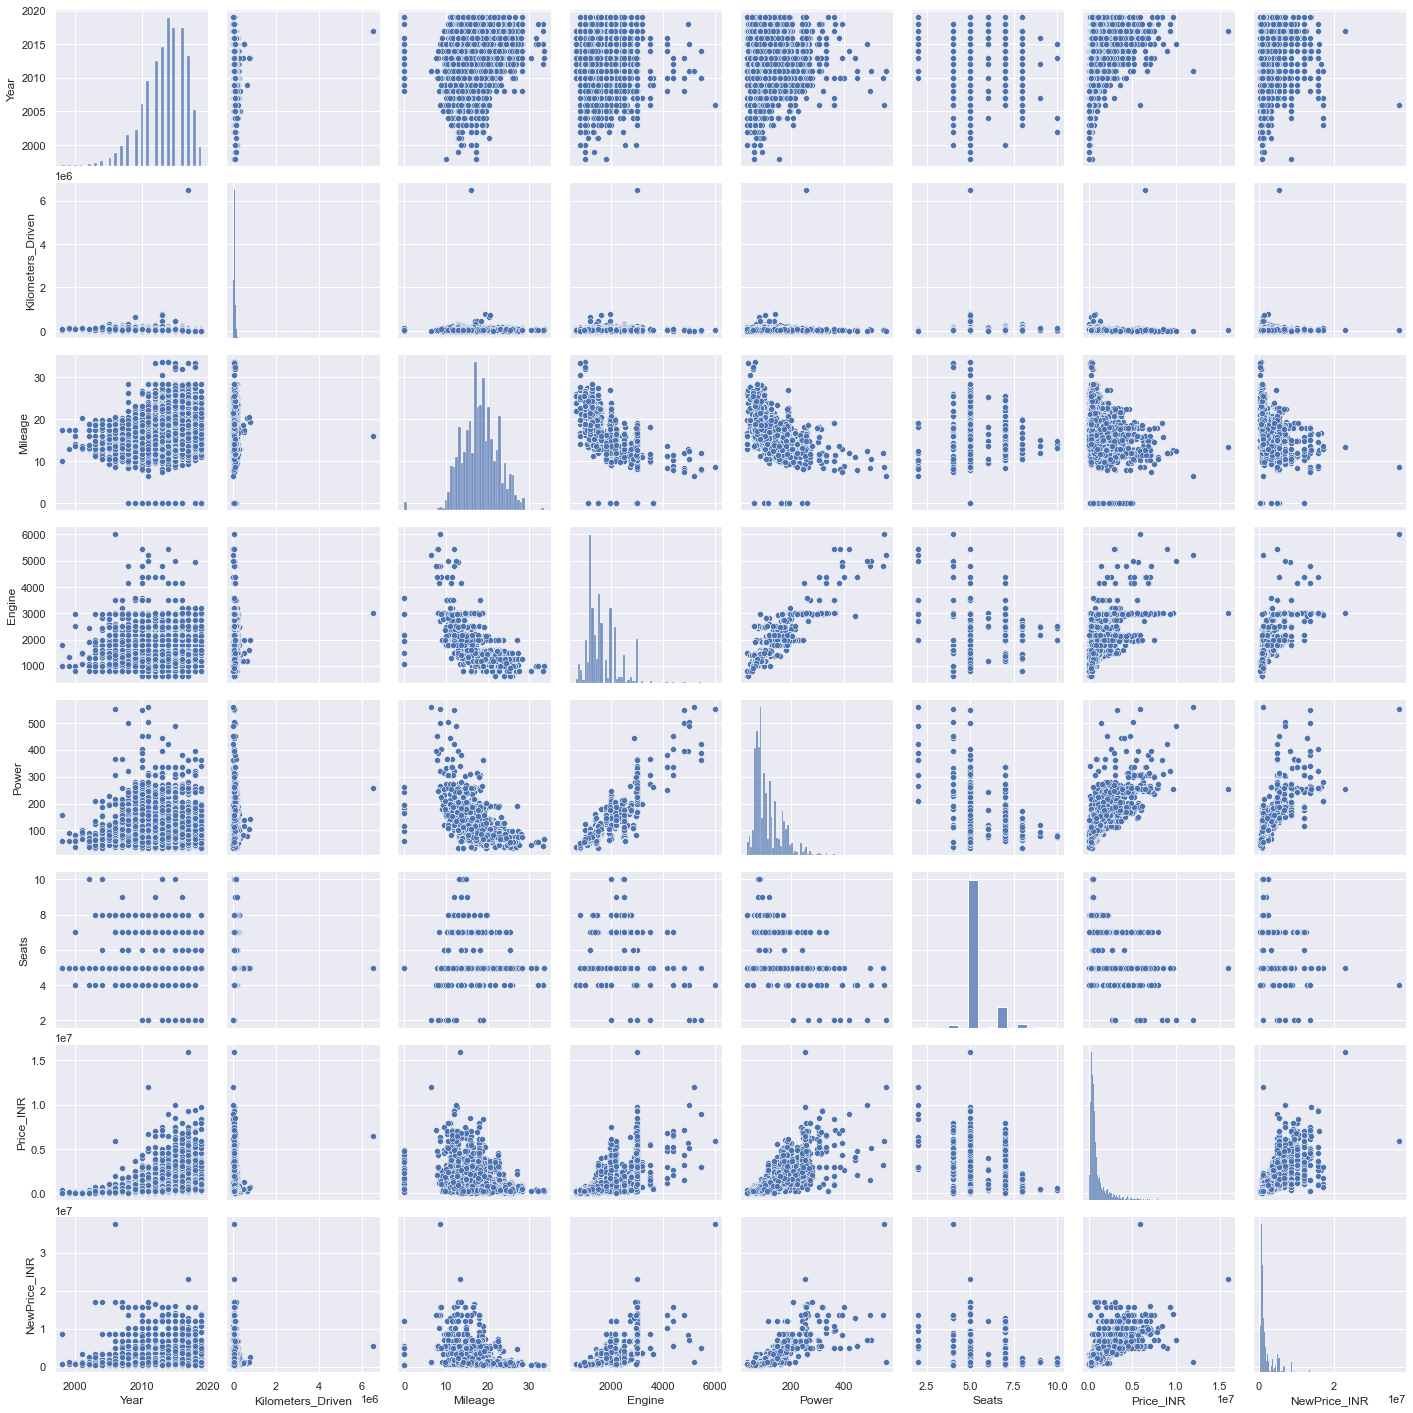

<IPython.core.display.Javascript object>

In [32]:
sns.pairplot(df)

Off the bat, noticing that Engine and Power have a tight correlation. This makes sense since in real life those who aspects of a car are strongly related. I'll go ahead and drop one of them.

In [33]:
df = df.drop(["Power"], axis=1)
df.head(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Seats,Price_INR,NewPrice_INR
0,Maruti,Mumbai,2010,72000.0,CNG,Manual,First,26.60,998.0,5.0,175000.0,551000.0
1,Hyundai,Pune,2015,41000.0,Diesel,Manual,First,19.67,1582.0,5.0,1250000.0,1606000.0
2,Honda,Chennai,2011,46000.0,Petrol,Manual,First,18.20,1199.0,5.0,450000.0,861000.0


<IPython.core.display.Javascript object>

Additionally, some things are pretty skewed! For example, a log transformation may help with the Price. See below - much better on the eyes, and for understanding. The log transformation decreases the scale of the distributions, even with the range of Prices. It seems the outliers caused the log-transformed distributions to still be a tiny bit skewed, but it is closer to normal.

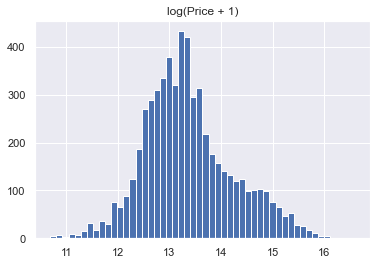

<IPython.core.display.Javascript object>

In [34]:
plt.hist(np.log(df["Price_INR"] + 1), 50)
plt.title(
    "log(Price + 1)"
)  # add a small value! hm!! also does not have a pre-defined range to scale the data
plt.show()

## Dealing with Outliers

In [35]:
# potentially using statistics that are robust to outliers
# instead of using statistics that are more sensitive to outliers
# running out analysis with and without outliers, to test sensitivity

# filtering out non null values
quartiles = np.quantile(df["Price_INR"][df["Price_INR"].notnull()], [0.25, 0.75])
power_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {power_4iqr}")

outlier_prices = df.loc[
    np.abs(df["Price_INR"] - df["Price_INR"].median()) > power_4iqr, "Price_INR"
]

outlier_prices

df = df.drop(outlier_prices.index, axis=0)

Q1 = 351250.0, Q3 = 1000000.0, 4*IQR = 2595000.0


<IPython.core.display.Javascript object>

This output is giving me Price entries that are 4x away from the median. For the sake of removing these outliers, I will drop the rows from my data before analysis. Price is an example! I will do so for the rest as well.

In [36]:
# New Prices
quartiles = np.quantile(df["NewPrice_INR"][df["NewPrice_INR"].notnull()], [0.25, 0.75])
power_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {power_4iqr}")

outlier_newprices = df.loc[
    np.abs(df["NewPrice_INR"] - df["NewPrice_INR"].median()) > power_4iqr,
    "NewPrice_INR",
]

outlier_newprices

df = df.drop(outlier_newprices.index, axis=0)

Q1 = 788000.0, Q3 = 1886499.9999999998, 4*IQR = 4393999.999999999


<IPython.core.display.Javascript object>

In [37]:
# Kilometers driven
quartiles = np.quantile(
    df["Kilometers_Driven"][df["Kilometers_Driven"].notnull()], [0.25, 0.75]
)
power_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {power_4iqr}")

outlier_kilo = df.loc[
    np.abs(df["Kilometers_Driven"] - df["Kilometers_Driven"].median()) > power_4iqr,
    "Kilometers_Driven",
]

outlier_kilo

df = df.drop(outlier_kilo.index, axis=0)

Q1 = 34400.0, Q3 = 73204.0, 4*IQR = 155216.0


<IPython.core.display.Javascript object>

In [38]:
# Engine
quartiles = np.quantile(df["Engine"][df["Engine"].notnull()], [0.25, 0.75])
power_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {power_4iqr}")

outlier_engine = df.loc[
    np.abs(df["Engine"] - df["Engine"].median()) > power_4iqr, "Engine"
]

outlier_engine

df = df.drop(outlier_engine.index, axis=0)

Q1 = 1197.0, Q3 = 1797.25, 4*IQR = 2401.0


<IPython.core.display.Javascript object>

In [39]:
# Mileage
quartiles = np.quantile(df["Mileage"][df["Mileage"].notnull()], [0.25, 0.75])
power_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {power_4iqr}")

outlier_mileage = df.loc[
    np.abs(df["Mileage"] - df["Mileage"].median()) > power_4iqr, "Mileage"
]

outlier_mileage

df = df.drop(outlier_mileage.index, axis=0)

Q1 = 16.0, Q3 = 21.43, 4*IQR = 21.72


<IPython.core.display.Javascript object>

In [40]:
# Year
quartiles = np.quantile(df["Year"][df["Year"].notnull()], [0.25, 0.75])
power_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {power_4iqr}")

outlier_year = df.loc[np.abs(df["Year"] - df["Year"].median()) > power_4iqr, "Year"]

outlier_year

df = df.drop(outlier_year.index, axis=0)

Q1 = 2012.0, Q3 = 2016.0, 4*IQR = 16.0


<IPython.core.display.Javascript object>

In [41]:
# Let's look at the statistical summary of the data again
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,5301,24,Maruti,1175,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,5301,11,Mumbai,696,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,5301,NaN,NaN,NaN,2013.42,3.15627,1998,2012,2014,2016,2019
Kilometers_Driven,5301,NaN,NaN,NaN,56925.4,32001.2,171,34063,53920,73000,205000
Fuel_Type,5301,4,Diesel,2664,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,5301,2,Manual,4144,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,5301,4,First,4372,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,5301,NaN,NaN,NaN,18.6967,4.19639,0,16,18.6,21.43,33.54
Engine,5301,NaN,NaN,NaN,1526.39,500.852,624,1197,1399,1796,3597
Seats,5301,NaN,NaN,NaN,5.29089,0.790921,2,5,5,5,10


<IPython.core.display.Javascript object>

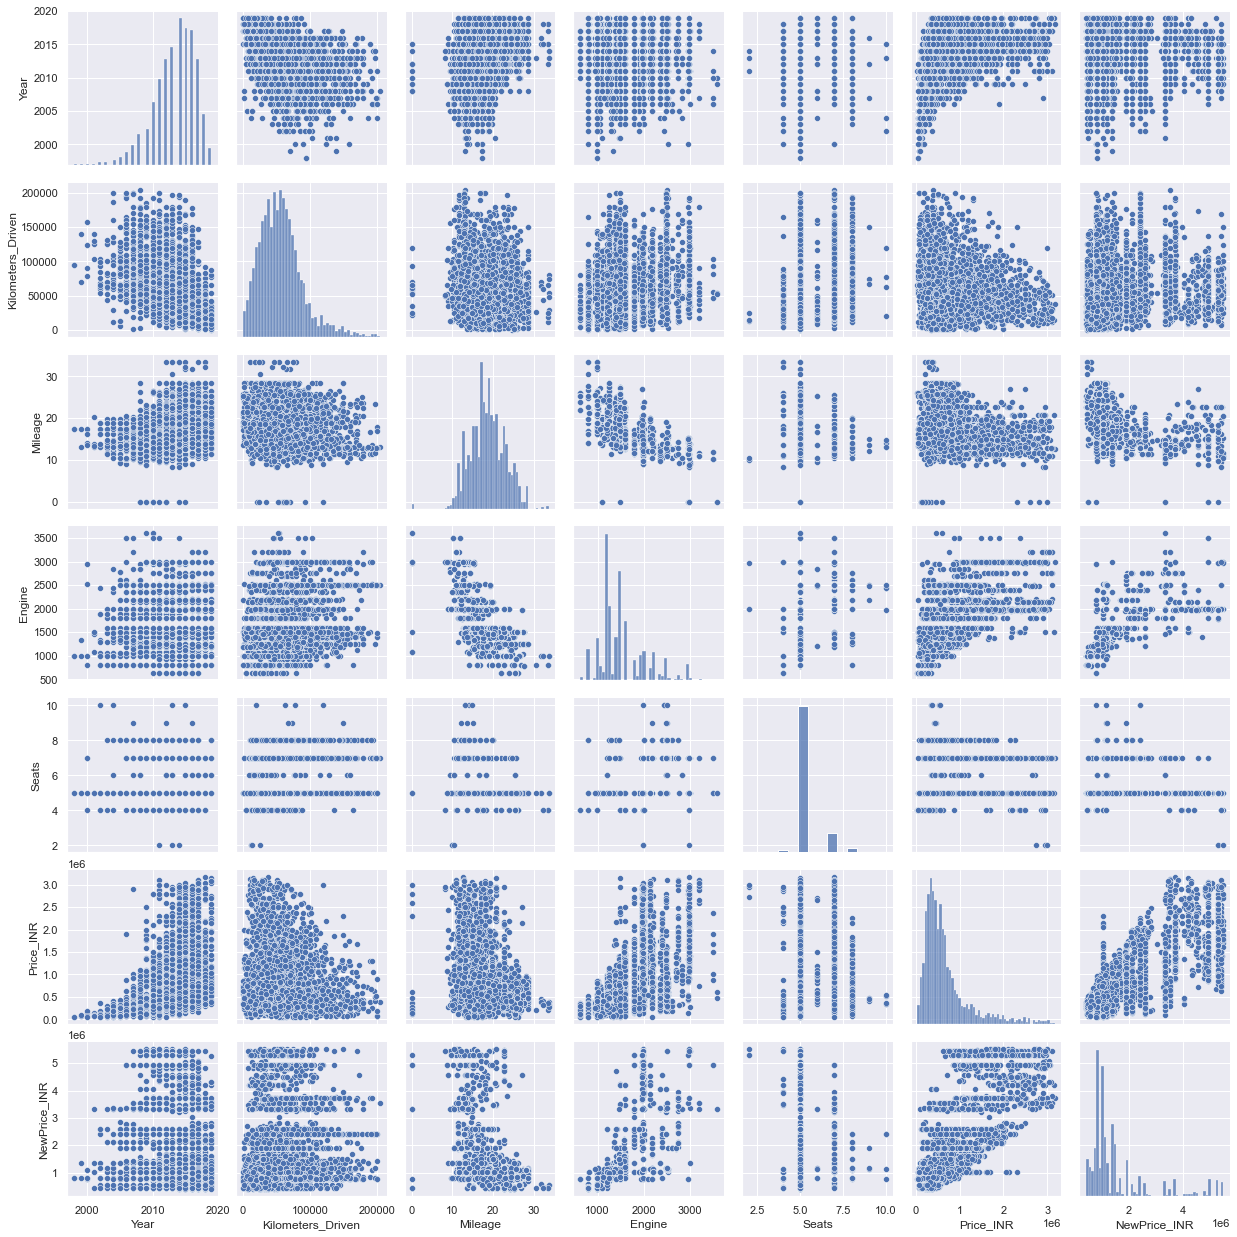

<IPython.core.display.Javascript object>

In [42]:
# our resulting pairplot - a little better than before
sns.pairplot(df)

## Univariate Analysis

In [43]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram


# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )
    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot
        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage
    plt.show()  # show the plot

<IPython.core.display.Javascript object>

For year, the mean is around 2013 to 2014, however the median lies to the right hand side of the mean. This is probably due to the left skew and presence of outliers. The newest car was made before 2020.

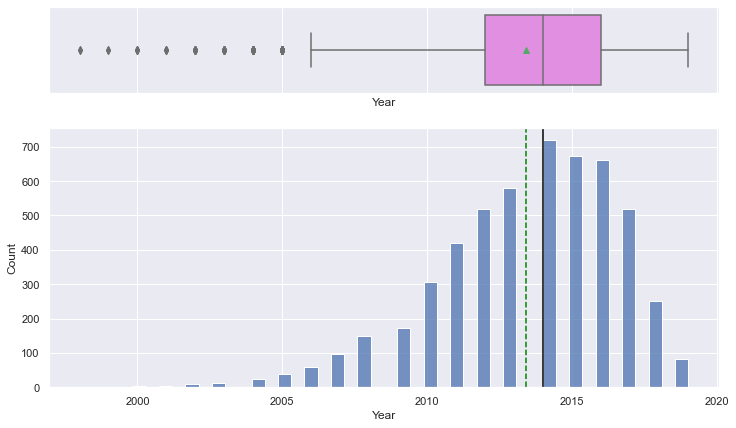

<IPython.core.display.Javascript object>

In [44]:
histogram_boxplot(df, "Year")

Kilometers driven has a right skew, with lots of outliers - however the mean and the median stay around 55-60k. Most cars have been driven below 110-120k kilometers.

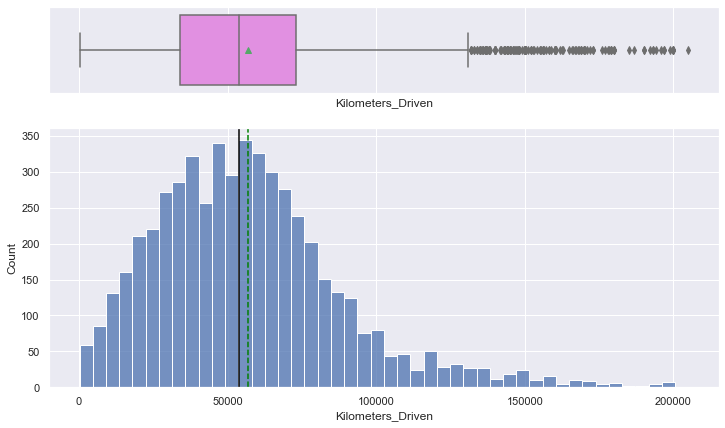

<IPython.core.display.Javascript object>

In [45]:
histogram_boxplot(df, "Kilometers_Driven")

Mileage looks like it has a relatively normal distribution with a slight left skew due to an outlier. Average and median mileage is around 18-19 kmpl.

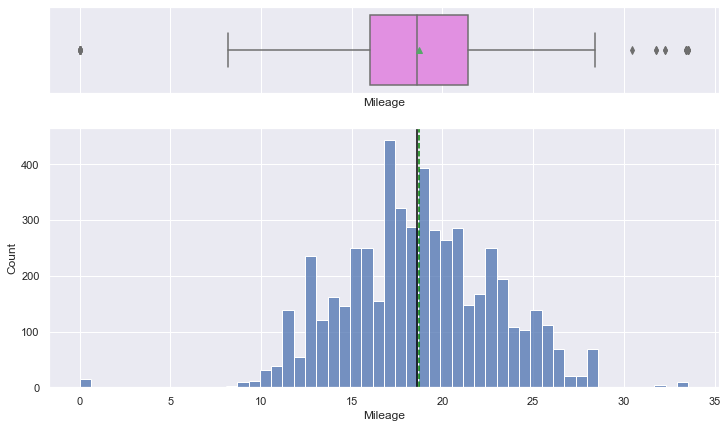

<IPython.core.display.Javascript object>

In [46]:
histogram_boxplot(df, "Mileage")

The dist for Engine is a little messy, but it appears to be most concentrated around 1200 and 1500. This could simply be due to the different availabilities of these engines and their tendency to be used in one particular model or make of car.

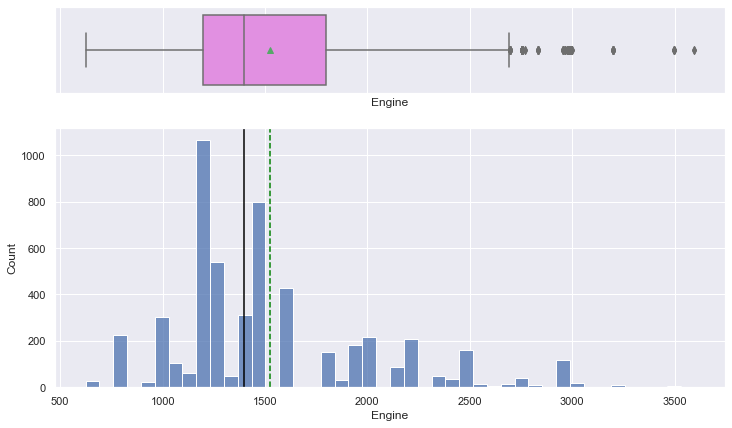

<IPython.core.display.Javascript object>

In [47]:
histogram_boxplot(df, "Engine")

Almost all cars have around 5 seats as an average - which makes sense for a typical sedan. Larger vehicles that seat 7-8 are less common.

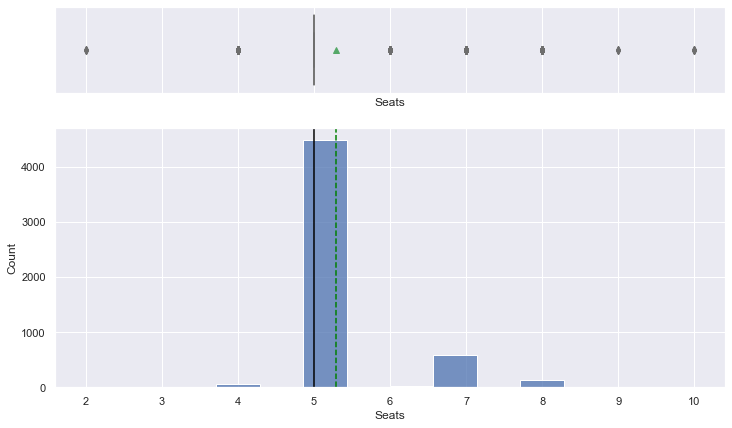

<IPython.core.display.Javascript object>

In [48]:
histogram_boxplot(df, "Seats")

The distributions of the price and new prices of the cars are a bit similar, which tempts me to remove the new price variable. However, the pairplot displayed a strong but very wide spread scatter, so I will leave it for now. The mean is pulled to the right due to outliers.

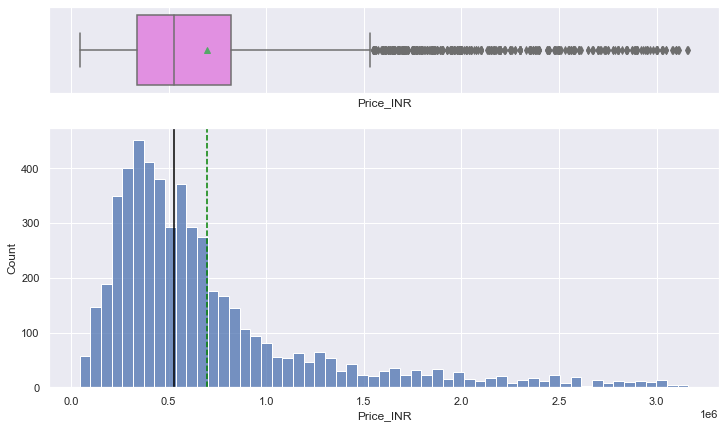

<IPython.core.display.Javascript object>

In [49]:
histogram_boxplot(df, "Price_INR")

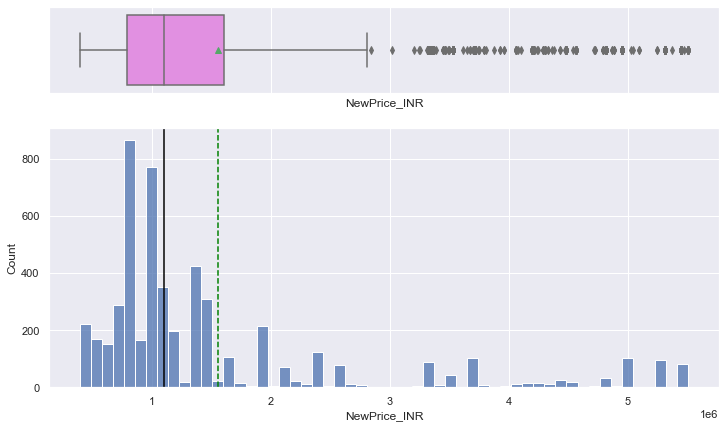

<IPython.core.display.Javascript object>

In [50]:
histogram_boxplot(df, "NewPrice_INR")

Some of the top car makers are Maruti (22.2%), Hyundai (19.9%) with Honda (11.3%) coming in third! Maruti is a make that is very prominent in India, which makes sense given the context of this study.

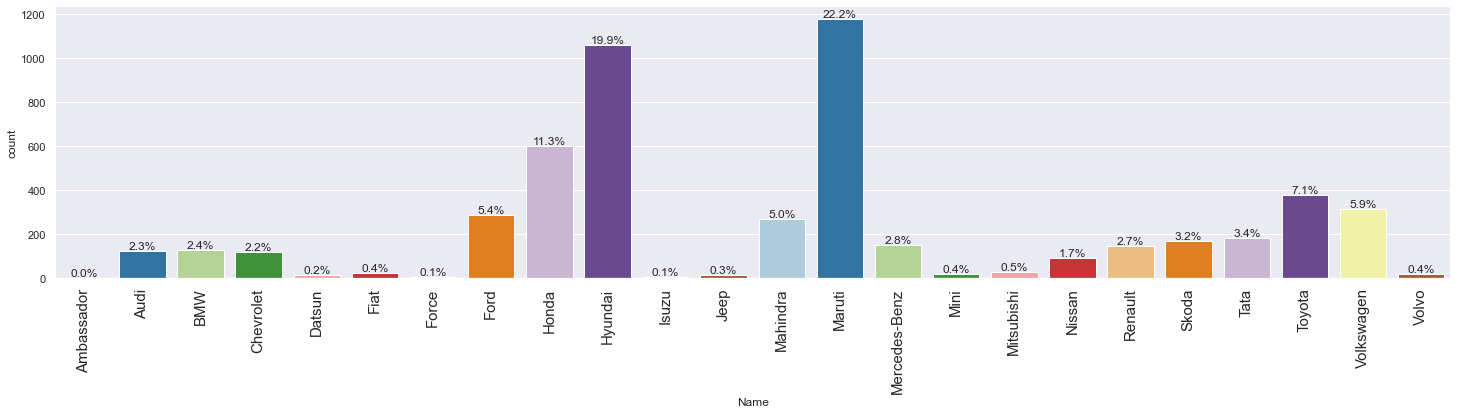

<IPython.core.display.Javascript object>

In [51]:
labeled_barplot(df, "Name", perc=True)

Location is pretty spread out, with Mumbai (13.1%) and Hyderabad(12.2%) being the top two locations.

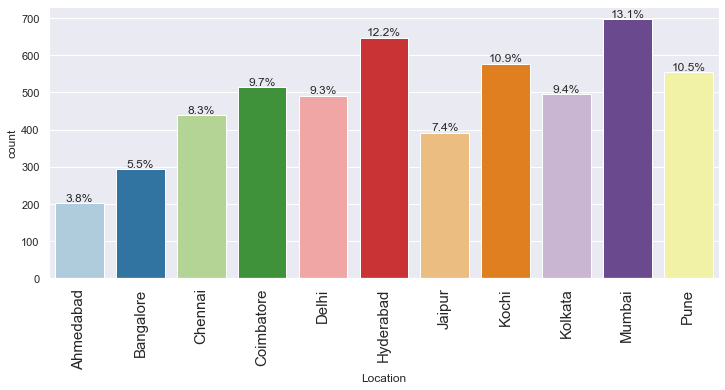

<IPython.core.display.Javascript object>

In [52]:
labeled_barplot(df, "Location", perc=True)

Owner Type is majority First (82.5%) meaning that the owners of the car were first-time owners.

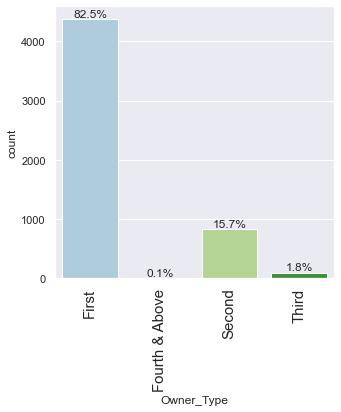

<IPython.core.display.Javascript object>

In [53]:
labeled_barplot(df, "Owner_Type", perc=True)

Fuel Type is majority Diesel (50.3%) and Petrol (48.5%), with cleaner gas alternatives such as CNG and LPG taking a backseat.

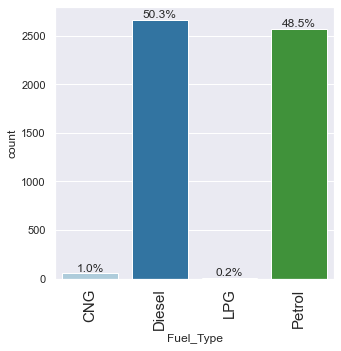

<IPython.core.display.Javascript object>

In [54]:
labeled_barplot(df, "Fuel_Type", perc=True)

Most of these cars are Manual (78.2%), and a minority are Automatic (21.8%).

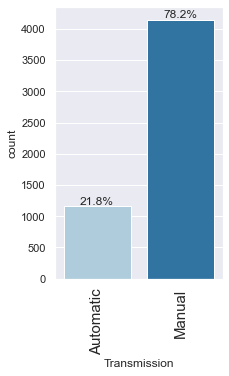

<IPython.core.display.Javascript object>

In [55]:
labeled_barplot(df, "Transmission", perc=True)

## Bivariate Analysis 

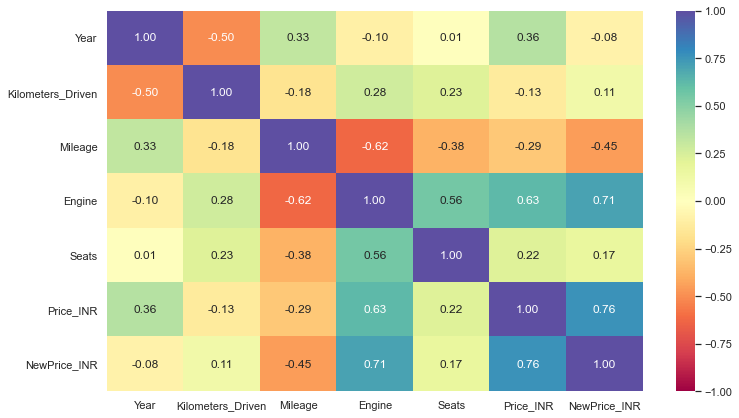

<IPython.core.display.Javascript object>

In [56]:
plt.figure(figsize=(12, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

Immediately noticing that the New Price variable is drawing high correlation to the Price and Engine variables at (0.76) and (0.71) respectively.

High correlations:
- New Price & Engine
- New Price & Price
- Price & Engine

Negative correlations:
- Year & Kilometers Driven
- Mileage & Engine
- Mileage & New Price

Checking out some categorical values reveals that different makes have vastly different distrbutions of used car prices, signaling that this variables may be a significant one. In general, prices are highest for makers such as Mercedes, BMW, AUdi, Volvo, and Mini. Toyota shows the greatest range in prices.

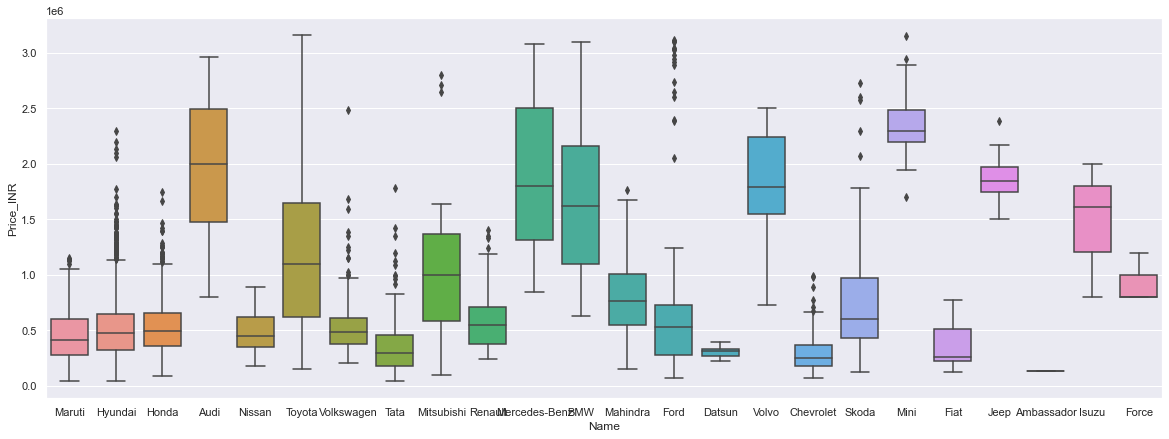

<IPython.core.display.Javascript object>

In [57]:
plt.figure(figsize=(20, 7))
sns.boxplot(x="Name", y="Price_INR", data=df)
plt.show()

Also, automatic cars tend to have higher prices vs. manual transmission cars, who's distribution in general skews upward with a handful of outliers.

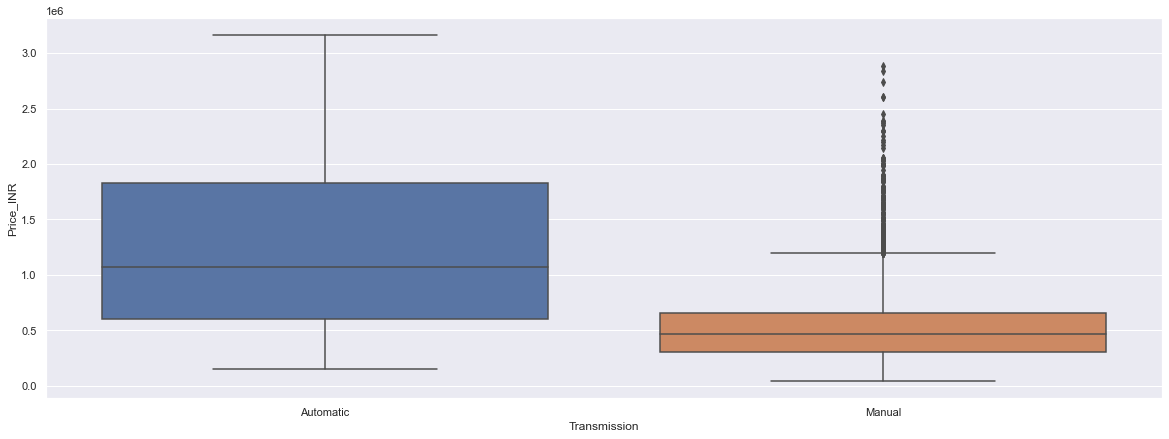

<IPython.core.display.Javascript object>

In [58]:
plt.figure(figsize=(20, 7))
sns.boxplot(x="Transmission", y="Price_INR", data=df)
plt.show()

When it comes to location, Bangalador and Coimbatore have higher price distributions than the rest, whereas areas such as Kolkata and Jaipur have relatively lower prices. Though overall, there are plenty of outliers in each location.

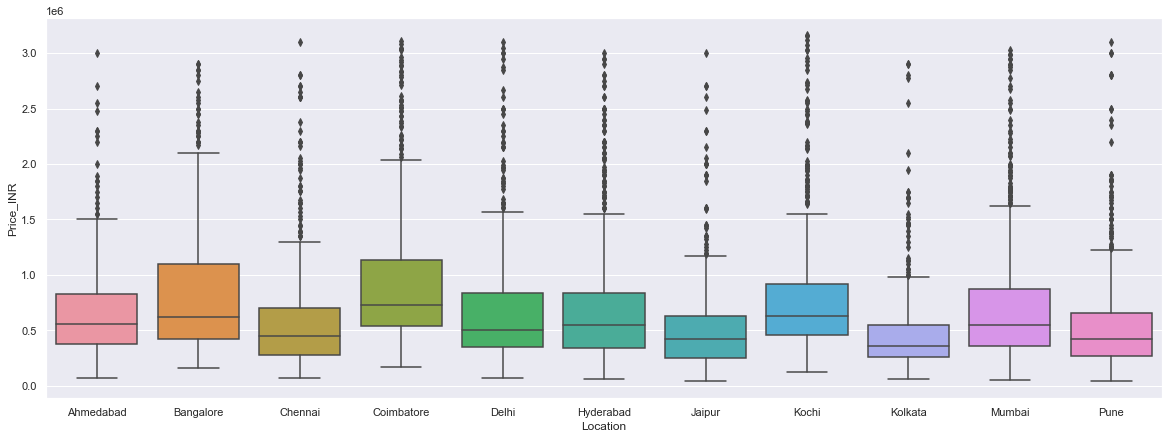

<IPython.core.display.Javascript object>

In [59]:
plt.figure(figsize=(20, 7))
sns.boxplot(x="Location", y="Price_INR", data=df)
plt.show()

# Model Building

In [60]:
# defining dependant variables
X = df.drop(["Price_INR"], axis=1)
y = df["Price_INR"]

<IPython.core.display.Javascript object>

In [61]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

X.head()

,Year,Kilometers_Driven,Mileage,Engine,Seats,NewPrice_INR,Name_Audi,Name_BMW,Name_Chevrolet,Name_Datsun,Name_Fiat,Name_Force,Name_Ford,Name_Honda,Name_Hyundai,Name_Isuzu,Name_Jeep,Name_Mahindra,Name_Maruti,Name_Mercedes-Benz,Name_Mini,Name_Mitsubishi,Name_Nissan,Name_Renault,Name_Skoda,Name_Tata,Name_Toyota,Name_Volkswagen,Name_Volvo,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000.0,26.60,998.0,5.0,551000.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
1,2015,41000.0,19.67,1582.0,5.0,1606000.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0
2,2011,46000.0,18.20,1199.0,5.0,861000.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
3,2012,87000.0,20.77,1248.0,7.0,1127000.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,2013,40670.0,15.20,1968.0,5.0,5314000.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0


<IPython.core.display.Javascript object>

In [62]:
# split into test & train sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [63]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 3710
Number of rows in test data = 1591


<IPython.core.display.Javascript object>

In [64]:
# Fitting the data to a linear model
from sklearn.linear_model import LinearRegression

lin_reg_model = LinearRegression()

lin_reg_model.fit(x_train, y_train)

LinearRegression()

<IPython.core.display.Javascript object>

## Coefficient Interpretations

Now let's check the coefficients and intercept of the model.

In [65]:
coef_df = pd.DataFrame(
    np.append(lin_reg_model.coef_, lin_reg_model.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)
coef_df

,Coefficients
Year,6.369390e+04
Kilometers_Driven,-2.075068e+00
Mileage,-1.511555e+04
Engine,2.400533e+02
Seats,-1.093266e+04
NewPrice_INR,2.480248e-01
Name_Audi,6.220872e+04
Name_BMW,-1.526311e+05
Name_Chevrolet,-1.011771e+05
Name_Datsun,-1.325562e+05


<IPython.core.display.Javascript object>

* Coefficients that are noticeably positive:
    - Year, New Price
    - Engine
    - Make Name: Audi, Hyundai, Jeep, Maruti, Mini, Toyota
    - Location: Bangalore, Coimbatore, Hyderabad, Pune
    - Diesel
An increase or presence in these characteristics will lead to an increase in the price of the car.


* Coefficients that are noticeably negative:
    - Make Name: Fiat, Ford, Isuzu, Nissan, Renault, Volkswagon
    - Location: Delhi, Mumbai
    - Petrol or LPG
    - Owner Type: 2nd or 3rd
An increase or presence in these will lead to a decrease in the price of the car.

Overall, this pricing model seems most sensitive to a car's make and location.

## Model Performance Check 

* We'll be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.

* We'll also create a function that will print out all the above metrics in one go.

In [66]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

<IPython.core.display.Javascript object>

In [67]:
# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100

<IPython.core.display.Javascript object>

In [68]:
# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [69]:
# Checking model performance on train set
print("Training Performance\n")
lin_reg_model_train_perf = model_performance_regression(lin_reg_model, x_train, y_train)
lin_reg_model_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,224426.342023,148166.208539,0.845084,0.843138,34.24418


<IPython.core.display.Javascript object>

In [70]:
# Checking model performance on test set
print("Test Performance\n")
lin_reg_model_test_perf = model_performance_regression(lin_reg_model, x_test, y_test)
lin_reg_model_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,224171.125549,148277.031423,0.831555,0.826537,30.657087


<IPython.core.display.Javascript object>

- The train and test $R^2$ are 0.85 and 0.83, indicating that the model explains 85% and 83% of the total variation in the train and test sets respectively.
- Additionally, both scores are similar, and RMSE values on the train and test sets are also comparable! This shows that the model is not overfitting.

- MAE is off, perhaps also indicating that our current model is off somehow? Unfortunately if not for the time-limit and quite the busy week I've had, I would go back and re-run this entire thing. After this assignment is graded, I will look into this for my personal portfolio/collection. Many sincere apologies.

- MAPE of 30.65 on the test data means that we are able to predict within about 31% of the used car price.

There are areas of that are worth investigating and model retraining, but according to the $R^2$ this model performed fairly well.

## Conclusions 

- A predictive model has been built so that Cars4U can effectively predict the rating of a used car with an $R^2$ of 0.845 on the training set.
    - In other words, this model explains 85% of the total variation in the train set.

- Overall, which make the car is and the location in which the car is being sold are some of the factors which tend to increase the price of a used car.
    - This may speak to the used-car market's preferences on certain brands, as well as some locations that are higher in demand for used cars.
    - Other factors are year, the original price of the new car, and engine - variables that may speak more contextually to the car's value.
    
- We also found that certain car brands and locations, are also some of the factors which tend to decrease the price of a used car.
    - Cars4U should pay attention to trends and fads surrounding certain brands, in order to get ahead of any changes in this variable.
    - Other factors is a car whose owner has already been on his 2nd or 3rd car - which may point to the 'First' owner type being a sweet-spot/more attractive characteristic.


- We set linear regression model up for success by pre-processing and engineering our data and carefully vetting the attributes.
    - Cars4U can also explore non-linear models, which might be able to better identify the patterns in the data to predict car prices with even higher accuracy.